# Reader & Wishlist Analytics

## Objective
This notebook analyzes reader behavior using simulated user interactions and
wishlist data. The goal is to understand user preferences and demonstrate how
wishlist information influences personalized book recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv("../data/processed/books_features.csv")
books.head()

,Unnamed: 0,bookId,title,author,series,description,genres,awards,characters,places,...,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5,popularity_score,rating_category,liked
0,0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,Harry Potter #6,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...",Locus Award Nominee for Best Young Adult Novel...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",...,41470.0,4.57,13147.0,29020.0,174312.0,608825.0,1728605.0,67.421832,High,1
1,1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",Harry Potter #5,There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Works for Young Readers ...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,44793.0,4.50,16236.0,41738.0,231438.0,665628.0,1676387.0,66.523668,High,1
2,2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter #1,Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",...,117823.0,4.48,126344.0,147184.0,627803.0,1694206.0,4839246.0,70.881127,High,1
3,3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,Harry Potter #2,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",...,55839.0,4.43,15623.0,55060.0,315917.0,787181.0,1704415.0,65.885949,High,1
4,4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré",Harry Potter #3,"For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Best Work for Young Read...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,58483.0,4.57,14124.0,29105.0,214151.0,701765.0,2013374.0,68.115487,High,1


In [3]:
np.random.seed(42)

num_users = 500
users = pd.DataFrame({
    "user_id": range(1, num_users + 1),
    "preferred_language": np.random.choice(
        books['language'].unique(),
        size=num_users
    )
})

users.head()

,user_id,preferred_language
0,1,Italian
1,2,Ladino
2,3,Danish
3,4,"Greek, Modern 1453-"
4,5,Arabic


In [4]:
ratings = []

for user in users['user_id']:
    sampled_books = books.sample(20, random_state=user)
    for _, row in sampled_books.iterrows():
        ratings.append({
            "user_id": user,
            "book_id": row['bookId'],
            "rating": np.random.choice([3, 4, 5], p=[0.2, 0.4, 0.4])
        })

ratings = pd.DataFrame(ratings)
ratings.head()

,user_id,book_id,rating
0,1,19342,3
1,1,19237,3
2,1,14571,3
3,1,4085,5
4,1,7176,3


In [5]:
ratings = []

for user in users['user_id']:
    sampled_books = books.sample(20, random_state=user)
    for _, row in sampled_books.iterrows():
        ratings.append({
            "user_id": user,
            "book_id": row['bookId'],
            "rating": np.random.choice([3, 4, 5], p=[0.2, 0.4, 0.4])
        })

ratings = pd.DataFrame(ratings)
ratings.head()

,user_id,book_id,rating
0,1,19342,4
1,1,19237,5
2,1,14571,4
3,1,4085,4
4,1,7176,5


In [6]:
wishlist = ratings[ratings['rating'] >= 4].sample(frac=0.5, random_state=42)
wishlist = wishlist[['user_id', 'book_id']]
wishlist['wishlist_flag'] = 1

wishlist.head()

,user_id,book_id,wishlist_flag
9959,498,1516,1
891,45,5792,1
3769,189,11193,1
9358,468,4434,1
3890,195,16994,1


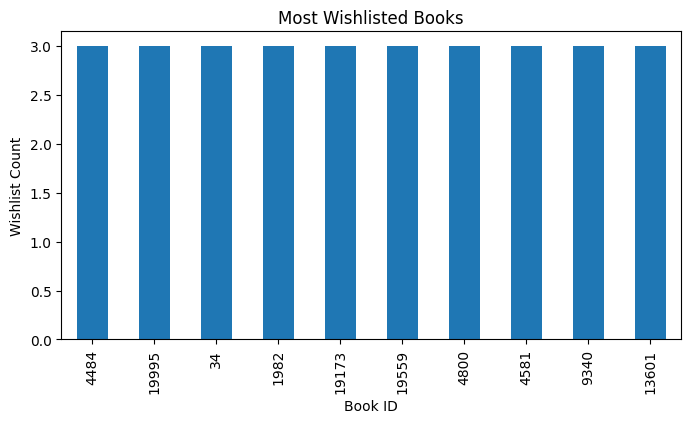

In [7]:
wishlist_counts = wishlist['book_id'].value_counts().head(10)

wishlist_counts.plot(kind='bar', figsize=(8,4))
plt.title("Most Wishlisted Books")
plt.xlabel("Book ID")
plt.ylabel("Wishlist Count")
plt.show()

In [8]:
wishlist_books = wishlist.merge(
    books[['bookId', 'genres']],
    left_on='book_id',
    right_on='bookId',
    how='left'
)

wishlist_books['genres'].value_counts().head(10)

genres
Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult,Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult                                                                                                                                               991
Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult,Art,Biography,Business,Children's,Christ

In [9]:
wishlist_books = wishlist_books.merge(
    books[['bookId', 'author']],
    on='bookId',
    how='left'
)

wishlist_books['author'].value_counts().head(10)

author
Dick Francis       46
Mark Bowden        23
Piers Anthony      22
Fred Saberhagen    13
Stephen King       13
Dan Simmons        12
David Burnie       12
Claire Messud      11
Seamus Heaney      11
Agatha Christie    10
Name: count, dtype: int64

In [10]:
user_wishlist_profile = wishlist_books.groupby('user_id').agg({
    'genres': lambda x: x.value_counts().idxmax(),
    'author': lambda x: x.value_counts().idxmax()
}).reset_index()

user_wishlist_profile.head()

,user_id,genres,author
0,1,"Art,Biography,Business,Children's,Christian,Cl...","I.M. Richardson,Anna Sewell"
1,2,"Art,Biography,Business,Children's,Christian,Cl...",Douglas Downing
2,3,"Art,Biography,Business,Children's,Christian,Cl...",Dick Francis
3,4,"Art,Biography,Business,Children's,Christian,Cl...",Gillian Avery
4,5,"Art,Biography,Business,Children's,Christian,Cl...",Piers Anthony


In [11]:
def recommend_from_wishlist(user_id, top_n=5):
    profile = user_wishlist_profile[user_wishlist_profile['user_id'] == user_id]
    
    if profile.empty:
        return pd.DataFrame()
    
    pref_genre = profile['genres'].values[0]
    pref_author = profile['author'].values[0]
    
    recommendations = books[
        (books['genres'] == pref_genre) |
        (books['author'] == pref_author)
    ].sort_values(by='popularity_score', ascending=False)
    
    return recommendations[['title', 'author', 'genres', 'avg_rating']].head(top_n)

In [12]:
recommend_from_wishlist(user_id=1)

,title,author,genres,avg_rating
5513,The Diary of Anne Frank: The Revised Critical ...,"Anne Frank,Gerrold van der Stroom,David Barnou...","Art,Biography,Business,Children's,Christian,Cl...",4.42
7471,Pride And Joy,Dee Williams,"Art,Biography,Business,Children's,Christian,Cl...",4.37
17955,Dostoyevsky's Notes from Underground (Critical...,"Richard Arthur Peace,Fyodor Dostoyevsky,R.A. P...","Art,Biography,Business,Children's,Christian,Cl...",4.36
168,NaN,NaN,"Art,Biography,Business,Children's,Christian,Cl...",3.93
19943,NaN,NaN,"Art,Biography,Business,Children's,Christian,Cl...",3.93


In [13]:
wishlist.to_csv("../data/processed/wishlist.csv", index=False)
ratings.to_csv("../data/processed/ratings.csv", index=False)
users.to_csv("../data/processed/users.csv", index=False)